<a href="https://colab.research.google.com/github/Amit-95/Bike_sharing_demand_pred/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

All the Lifecycle In A Data Science Projects

Data Analysis

Feature Engineering

Feature Selection

Model Building

Model Deployment

# ***Import Libraries and Data*** 

In [39]:
# Import necessary libraries

import numpy as np
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext google.colab.data_table

import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [40]:
from sklearn.feature_selection import SelectFromModel

from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from xgboost import plot_importance

import lightgbm 

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data = pd.read_csv('/content/drive/MyDrive/Almabetter_related_stuff/Data_/Copy of SeoulBikeData.csv',encoding='unicode_escape')

***First Look***

In [43]:
# Fisrt 5 values.
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [44]:

# Last 5 values.
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


 **Let's check the duplicate entries**

In [45]:
print("Duplicate entry in data:",len(data[data.duplicated()])) 


Duplicate entry in data: 0


In [46]:
data.count()

Date                         8760
Rented Bike Count            8760
Hour                         8760
Temperature(°C)              8760
Humidity(%)                  8760
Wind speed (m/s)             8760
Visibility (10m)             8760
Dew point temperature(°C)    8760
Solar Radiation (MJ/m2)      8760
Rainfall(mm)                 8760
Snowfall (cm)                8760
Seasons                      8760
Holiday                      8760
Functioning Day              8760
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [48]:
temp=pd.DataFrame(index=data.columns)
temp['Unique_values'] = data.nunique()

In [49]:
temp['NaN_Values'] = data.isnull().sum()

In [50]:
temp['NaN_Values_Percentage'] = (temp['NaN_Values']/len(data))*100 

In [51]:
temp

,Unique_values,NaN_Values,NaN_Values_Percentage
Date,365,0,0.0
Rented Bike Count,2166,0,0.0
Hour,24,0,0.0
Temperature(°C),546,0,0.0
Humidity(%),90,0,0.0
Wind speed (m/s),65,0,0.0
Visibility (10m),1789,0,0.0
Dew point temperature(°C),556,0,0.0
Solar Radiation (MJ/m2),345,0,0.0
Rainfall(mm),61,0,0.0


In [52]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 

Total Rows and Columns in DataFrame is : (8760, 14) 



The dataset contains 8760 rows and 14 columns. Each row of the dataset contains information about weather conditions

Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes. using the values in the other columns. If we can do so for the historical data, then we should able to estimate bike count required at each hour.

Looks like "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data. None of the columns contain any missing values, which saves us a fair bit of work!

***Here are some statistics for the numerical columns:***

In [53]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


And the ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning or correction. The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

In [54]:

# Filter the Functioning Day
data=data[data["Functioning Day"] == "Yes"]

***Step 1 - Exploratory Analysis and Visualization***

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.


***Seperate Date, Month, Year from Date Column***

In [55]:

data['Date'] = pd.to_datetime(data['Date'])
data['Day']=data['Date'].dt.day              # compute day
data['Month']=data['Date'].dt.month          # compute month
data['Year']=data['Date'].dt.year            # compute year
data.drop(columns=["Date"],inplace=True)

# Numerical Data

In [56]:
# list of numerical variables
numerical_features=[col for col in data.columns if data[col].dtype!='O']
# Separate dataframe for Numerical feature
num_data=data[numerical_features]
num_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,2017


In [57]:
num_data.shape

(8465, 13)

# Categorical Data

In [58]:
# list of categorical variables
categorical_features=[col for col in data.columns if data[col].dtype=='O']
# Separate dataframe for Categorical feature
cat_data=data[categorical_features]
cat_data.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


***Discrete Variables***

In [71]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<32]

In [73]:
discrete_feature

['Hour', 'Day', 'Month', 'Year']

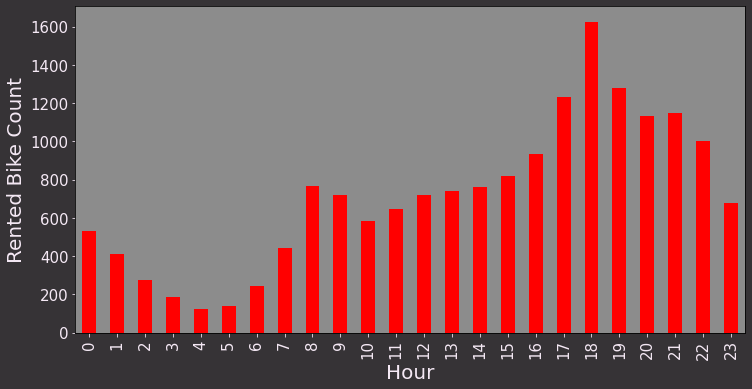

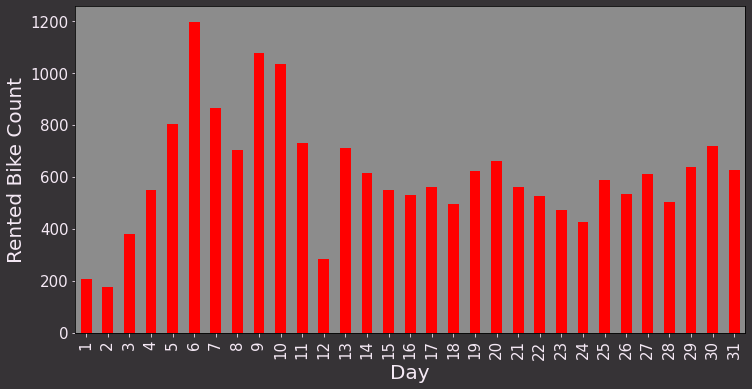

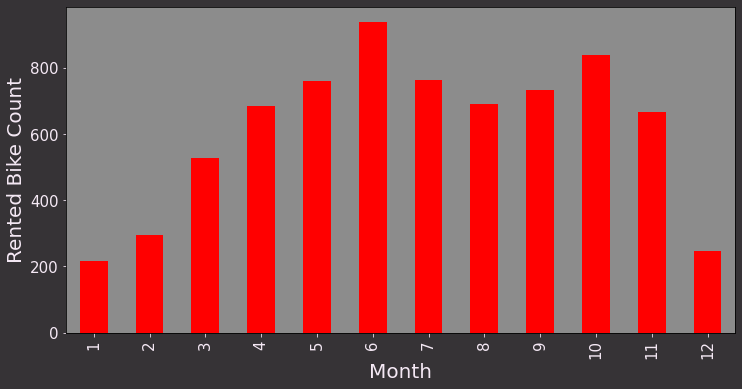

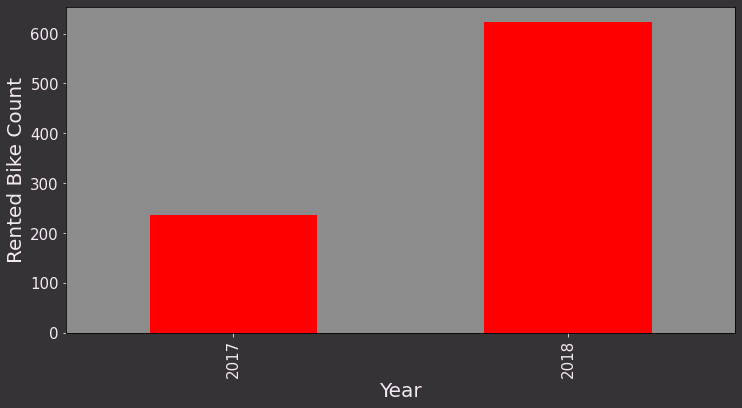

In [75]:
## Lets analyse the discrete values by creating histograms to understand the distribution with respect to timeframe
for feature in discrete_feature:
    dataset=data.copy()
    fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    dataset.groupby(feature)['Rented Bike Count'].median().plot.bar(color='red')
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(feature, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Rented Bike Count",  color='#F5E9F5', fontsize=20)  

***
*June is the most preferred Month for bike sharing

*July and May are the second best

*Bike sharing was least in December and January

**Continuos Variables**

Continuous feature Count 9


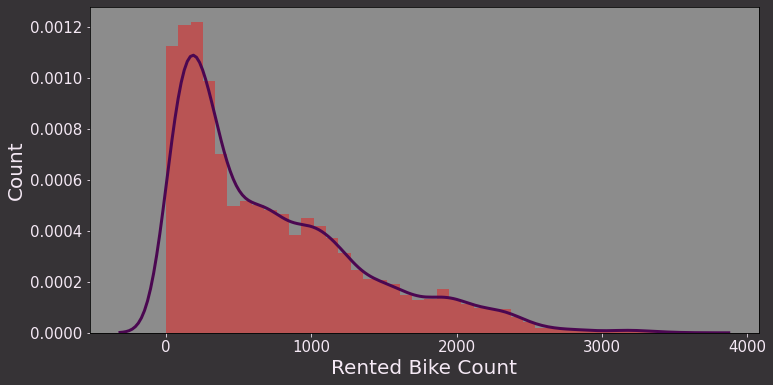

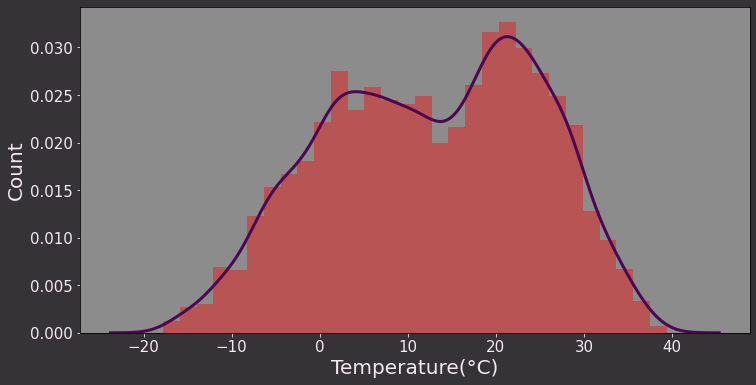

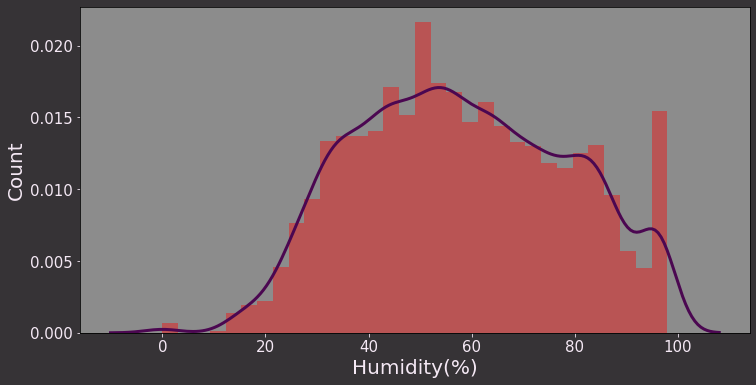

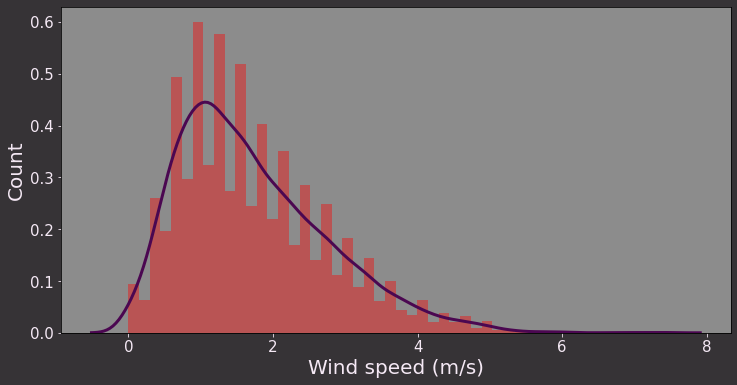

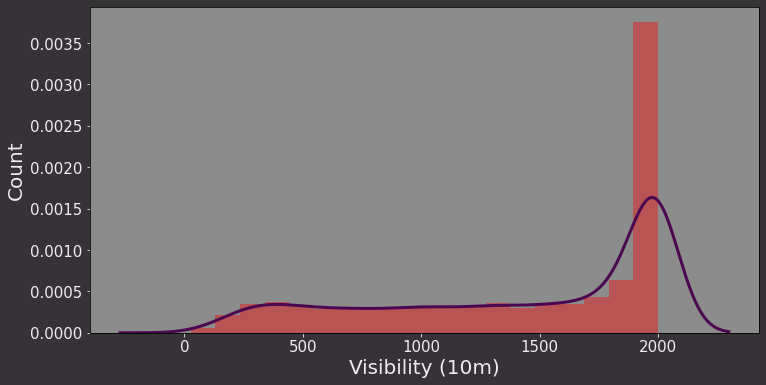

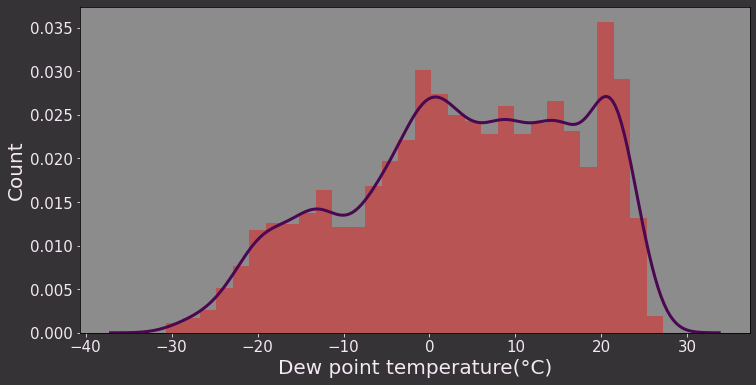

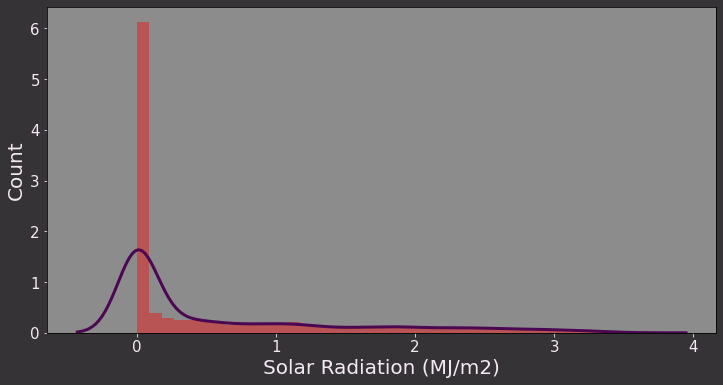

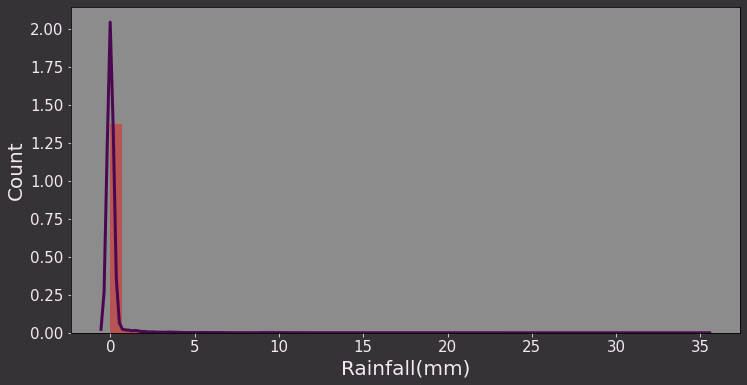

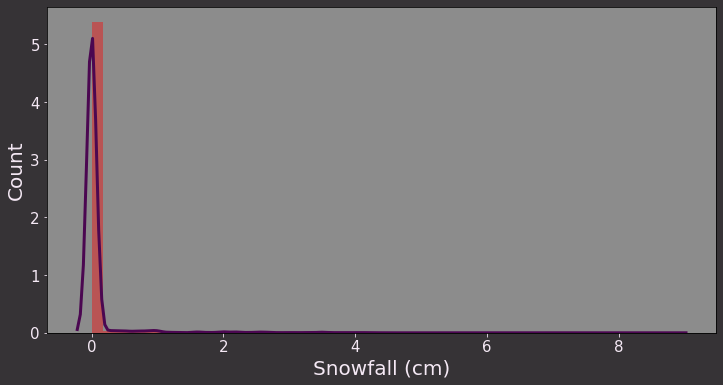

In [76]:
## Lets analyse the continuous values by creating histograms to understand the distribution
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

for feature in continuous_feature:
    dataset=data.copy()
    fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    sns.distplot(dataset[feature],color='r',kde_kws={'linewidth':3,'color':'#4B0751'});
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(feature, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Count",  color='#F5E9F5', fontsize=20)

Bike sharing is at its peak between 4pm- 6pm

Bike shaing is least between 4am-6am.

Most preferred temperature for bike renting is 20-30 Degree Celcius.

Bike sharing is least when temperatur is < 5 and >35 Degree Celcius.

Humidity of 40%-60% is most favourable for bike sharing.

Wind speed of 1m/s -2 m/s is most favourable for bike sharing.

Bike sharing count is directly related to Visbility in the area.

Dew Point Temperature of 5-25 Degree Celcius is most favourable for bike sharing.

Optimum Solar Radiation, no rainfall and no snowfall leads to higher bike renting in Seoul.

***Categorical Variables***

In [79]:
# Unique number of categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2
The feature is Functioning Day and number of categories are 1


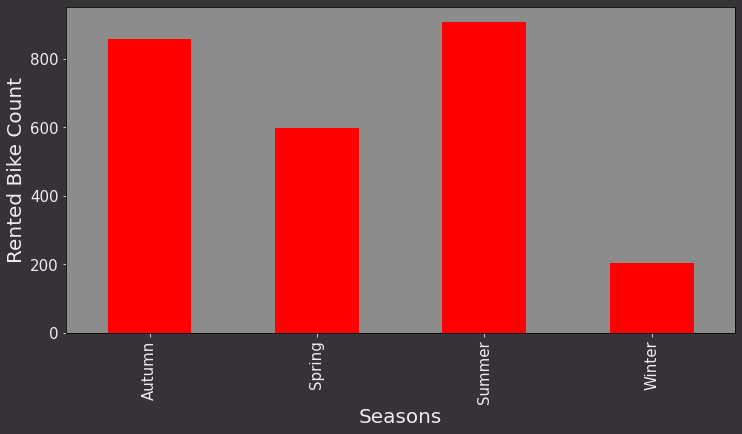

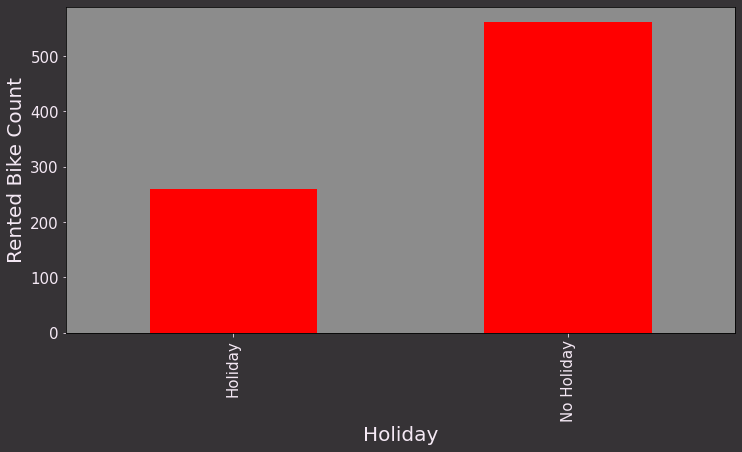

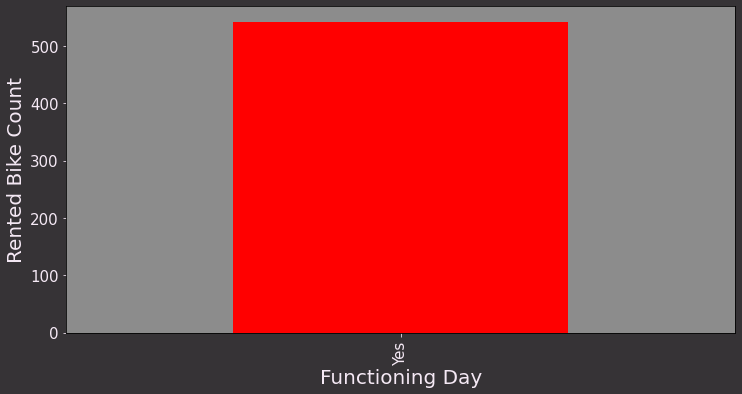

In [80]:
#Find out the relationship between categorical variable and dependent feature Rented Bike Count
for feature in categorical_features:
    fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    dataset.groupby(feature)['Rented Bike Count'].median().plot.bar(color='red')
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(feature, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Rented Bike Count",  color='#F5E9F5', fontsize=20)